# Ames Housing Dataset

In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy
import math

##Settings
pd.options.display.max_rows = 30
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

In [84]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
df["LSalePrice"]=np.log(df["SalePrice"])
temp=df.columns.values.tolist()
temp.remove("SalePrice")
temp.remove("LSalePrice")
col=["SalePrice","LSalePrice"]+temp
df=df[col]

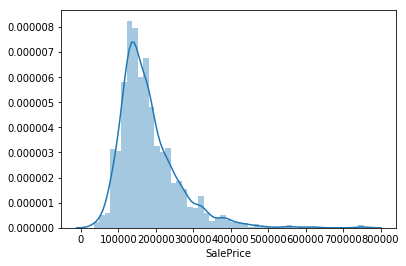

In [85]:
sns.distplot(train["SalePrice"])

In [86]:
df.head()

,SalePrice,LSalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,208500.0000,12.2477,856,854,0,NaN,3,1Fam,TA,No,706.0000,0.0000,GLQ,Unf,1.0000,0.0000,Gd,150.0000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0000,2.0000,TA,RFn,TA,Attchd,2003.0000,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0000,Reg,0,60,RL,196.0000,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0000,AllPub,0,2003,2003,2008
1,181500.0000,12.1090,1262,0,0,NaN,3,1Fam,TA,Gd,978.0000,0.0000,ALQ,Unf,0.0000,1.0000,Gd,284.0000,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0000,2.0000,TA,RFn,TA,Attchd,1976.0000,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0000,Reg,0,20,RL,0.0000,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0000,AllPub,298,1976,1976,2007
2,223500.0000,12.3172,920,866,0,NaN,3,1Fam,TA,Mn,486.0000,0.0000,GLQ,Unf,1.0000,0.0000,Gd,434.0000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0000,2.0000,TA,RFn,TA,Attchd,2001.0000,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0000,IR1,0,60,RL,162.0000,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0000,AllPub,0,2001,2002,2008
3,140000.0000,11.8494,961,756,0,NaN,3,1Fam,Gd,No,216.0000,0.0000,ALQ,Unf,1.0000,0.0000,TA,540.0000,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0000,3.0000,TA,Unf,TA,Detchd,1998.0000,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0000,IR1,0,70,RL,0.0000,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0000,AllPub,0,1915,1970,2006
4,250000.0000,12.4292,1145,1053,0,NaN,4,1Fam,TA,Av,655.0000,0.0000,GLQ,Unf,1.0000,0.0000,Gd,490.0000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0000,3.0000,TA,RFn,TA,Attchd,2000.0000,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0000,IR1,0,60,RL,350.0000,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0000,AllPub,192,2000,2000,2008


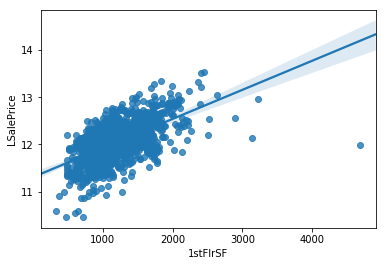

In [87]:
p=sns.regplot(x="1stFlrSF",y="LSalePrice",data=df)

### Preprocessing

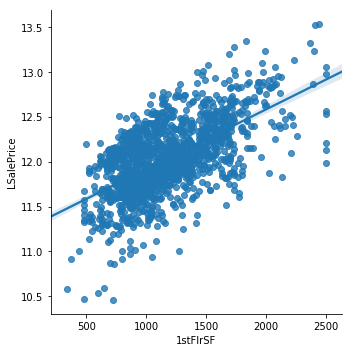

In [88]:
def clip(dataframe,feature,maximum):
    index=dataframe[dataframe[feature]>maximum].index.values
    dataframe.loc[index,feature]=maximum
    return dataframe    
df=clip(df,"1stFlrSF",2500)
g=sns.lmplot(x="1stFlrSF",y="LSalePrice",data=df)

### Filling missing values

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
SalePrice        1460 non-null float64
LSalePrice       1460 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2

In [90]:
df["BsmtQual"][0]

'Gd'

In [91]:
tofill=["BsmtFullBath","BsmtHalfBath","GarageArea","GarageCars","MasVnrArea","TotalBsmtSF","BsmtUnfSF"]
for i in tofill:
    df[i].fillna(df[i].median(),inplace=True)

In [92]:
del df["Utilities"]

In [93]:
tofill2=["SaleType","MSZoning","MasVnrType","KitchenQual","Functional","Exterior1st","Exterior2nd","Electrical"]
for j in tofill2:
    df[j].fillna(df[j].value_counts().idxmax(),inplace=True)

In [94]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col].fillna("None",inplace=True)

In [95]:
df["Alley"].fillna("None",inplace=True)

In [96]:
df["BsmtCond"].fillna("TA",inplace=True)

In [97]:
df["BsmtExposure"].fillna("Av",inplace=True)

In [98]:
df["PoolQC"].fillna("None",inplace=True)

In [99]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [100]:
df["Fence"] = df["Fence"].fillna("None")

In [101]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [102]:
df["BsmtFinSF1"].fillna(df["BsmtFinSF1"].median(),inplace=True)
df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].median(),inplace=True)

In [103]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [104]:
for k in ["BsmtFinType1","BsmtFinType2","BsmtQual"]:
    df[k].fillna("None",inplace=True)

In [105]:
df["GarageYrBlt"].fillna(0,inplace=True)

In [106]:
df["MoSold"]=df["MoSold"].astype(str)

In [107]:
df["YrSold"]=df["YrSold"].astype(str)

In [108]:
df["MSSubClass"]=df["MSSubClass"].astype(str)

In [109]:
del df["LSalePrice"]

### Model

In [227]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.base import clone, BaseEstimator

##Regressors
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [280]:
df_dummies=pd.get_dummies(data=df)
train_dummies=df_dummies[:1460]
test_dummies=df_dummies[1460:]
X=train_dummies.drop(columns="SalePrice")
y=train_dummies["SalePrice"].values
X_test=test_dummies.drop(columns="SalePrice")
print("X shape: %d x %d." % (X.shape[0],X.shape[1]))
print("Length y: %d" % (len(y)))
print("X_test shape: %d x %d." % (X_test.shape[0],X_test.shape[1]))

X shape: 1460 x 329.
Length y: 1460
X_test shape: 1459 x 329.


In [111]:
def root_mean_squared_error(truth,predictions):
    return np.sqrt(sum((truth-predictions) ** 2)/len(truth))
rmse_scorer=make_scorer(root_mean_squared_error,greater_is_better=False)

In [269]:
regr=[LinearRegression(),Lasso(alpha=0.001),Ridge(alpha=10),XGBRegressor(max_depth=3),\
      RandomForestRegressor(max_depth=25,n_estimators=60)]

In [270]:
def cross_validation(regr=regr,X_train=X,y_train=np.log(y),scoring=rmse_scorer,cv=3):
    names=[]
    mean_test_scores=[]
    test_stds=[]
    mean_train_scores=[]
    train_stds=[]
    coef=[]
    outcomes={}
    
    for r in regr:
        name=r.__class__.__name__
        names.append(name)
        outcomes[name]=cross_validate(r,X_train,y_train,scoring=rmse_scorer,cv=cv)
        
        mean_test_scores.append(-outcomes[name]["test_score"].mean())
        test_stds.append(outcomes[name]["test_score"].std())
        mean_train_scores.append(-outcomes[name]["train_score"].mean())
        train_stds.append(outcomes[name]["train_score"].std())
        
        r.fit(X_train,y_train)
        
        if name in ["LinearRegression","Lasso","Ridge"]:
            coef.append(r.coef_)
    
    regr_results=pd.DataFrame({"Regressor":names,"Mean train score":mean_train_scores,\
                               "Train std":train_stds,"Mean test score":mean_test_scores,\
                                "test_std":test_stds},index=np.arange(len(names)))
    display(regr_results)
    
    results=pd.DataFrame({"Features":X_train.columns.values,"LinearRegression":coef[0],"Lasso":coef[1],\
                          "Ridge":coef[2]}).sort_values(by="Lasso",ascending=False)
    return outcomes,results

In [271]:
outcomes,results=cross_validation()

,Regressor,Mean train score,Train std,Mean test score,test_std
0,LinearRegression,0.0847,0.0052,0.1418,0.0114
1,Lasso,0.1047,0.0056,0.1208,0.0125
2,Ridge,0.0951,0.0058,0.1224,0.0116
3,XGBRegressor,0.0804,0.0027,0.1329,0.0095
4,RandomForestRegressor,0.0564,0.0017,0.1473,0.0072


In [145]:
results

,Features,LinearRegression,Lasso,Ridge
267,Neighborhood_Crawfor,0.0993,0.0851,0.0845
26,OverallQual,0.0370,0.0574,0.0458
105,Exterior1st_BrkFace,0.0969,0.0548,0.0562
156,Functional_Typ,0.1295,0.0525,0.0676
73,Condition1_Norm,0.0486,0.0456,0.0487
25,OverallCond,0.0348,0.0444,0.0402
283,Neighborhood_StoneBr,0.1311,0.0344,0.0752
199,KitchenQual_Ex,0.0441,0.0329,0.0376
264,Neighborhood_BrkSide,0.0121,0.0311,0.0290
146,Foundation_PConc,0.0308,0.0296,0.0209


In [132]:
results.set_index("Features").filter(like="Neigh",axis=0)

,LinearRegression,Lasso,Ridge
Features,,,
Neighborhood_Crawfor,0.0938,0.0760,0.0908
Neighborhood_StoneBr,0.1465,0.0519,0.1271
Neighborhood_BrkSide,0.0076,0.0330,0.0229
Neighborhood_Somerst,0.0016,0.0238,0.0056
Neighborhood_NridgHt,0.0535,0.0154,0.0437
Neighborhood_NoRidge,0.0461,0.0076,0.0578
Neighborhood_CollgCr,-0.0187,-0.0000,-0.0193
Neighborhood_Blmngtn,0.0060,-0.0000,-0.0132
Neighborhood_Blueste,0.0147,-0.0000,-0.0011


### Parameter tuning

In [222]:
lasso=[Lasso(alpha=0.0001),Lasso(alpha=0.001),Lasso(alpha=0.01),Lasso(alpha=0.1)]

In [224]:
outcomes,results=cross_validation(regr=lasso)

,Regressor,Mean train score,Train std,Mean test score,test_std
0,Lasso,0.0880,0.0047,0.1264,0.0085
1,Lasso,0.1047,0.0056,0.1208,0.0125
2,Lasso,0.1314,0.0059,0.1370,0.0097
3,Lasso,0.1578,0.0032,0.1650,0.0050


In [225]:
ridge=[Ridge(alpha=0.1),Ridge(alpha=1),Ridge(alpha=10),Ridge(alpha=100),Ridge(alpha=1000)]

In [226]:
outcomes,results=cross_validation(regr=ridge)

,Regressor,Mean train score,Train std,Mean test score,test_std
0,Ridge,0.0851,0.0050,0.1353,0.0086
1,Ridge,0.0873,0.0051,0.1269,0.0102
2,Ridge,0.0951,0.0058,0.1224,0.0116
3,Ridge,0.1092,0.0064,0.1242,0.0125
4,Ridge,0.1311,0.0059,0.1392,0.0092


In [260]:
xgb_parameters={"gamma":[0],"max_depth":[2,3,5]}
xgb_reg=GridSearchCV(XGBRegressor(),xgb_parameters,scoring=rmse_scorer,cv=3)
_=xgb_reg.fit(X,np.log(y))
print(xgb_reg.best_score_)
xgb_reg.best_params_

-0.13287593812287335


{'gamma': 0, 'max_depth': 3}

In [268]:
rf_parameters={"max_depth":[25,35],"n_estimators":[40,60,80]}
rf_reg=GridSearchCV(RandomForestRegressor(random_state=42),rf_parameters,scoring=rmse_scorer,cv=3)
_=rf_reg.fit(X,np.log(y))
print(rf_reg.best_score_)
rf_reg.best_params_

-0.14758391582798866


{'max_depth': 25, 'n_estimators': 60}

### Ensemble method

In [272]:
class AverageModels(BaseEstimator):
    def __init__(self, models):
        self.models=models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for m in self.models_:
            m.fit(X,y)
    
    def predict(self, X):
        predictions = np.column_stack(m.predict(X) for m in self.models_)
        return np.mean(predictions, axis=1)

In [275]:
r=AverageModels(regr[1:4])

In [274]:
cross_val_score(r,X,np.log(y),scoring=rmse_scorer,cv=3).mean()

-0.11825120552017905

### Outcome

In [282]:
r=AverageModels(regr[1:4])

In [283]:
r.fit(X,np.log(y))

In [284]:
pred_test=r.predict(X_test)

In [285]:
final=np.e ** pred_test

In [286]:
submission=pd.DataFrame({"Id":np.arange(1461,2920),"SalePrice":final})

In [287]:
submission.to_csv("ThirdSubmissionAmes.csv",index=False)